Best solution cost at generation 0 : 418.92760653629534
Best solution cost at generation 10 : 407.63854113924725
Best solution cost at generation 20 : 400.6393002201704
Best solution cost at generation 30 : 406.8484358198647
Best solution cost at generation 40 : 399.0610051548436
Best solution cost at generation 50 : 403.5302798724272
Best solution cost at generation 60 : 404.45974923488205
Best solution cost at generation 70 : 400.9166594380524
Best solution cost at generation 80 : 409.65006058520754
Best solution cost at generation 90 : 400.08624633247786
Best solution cost at generation 100 : 405.32662605893114


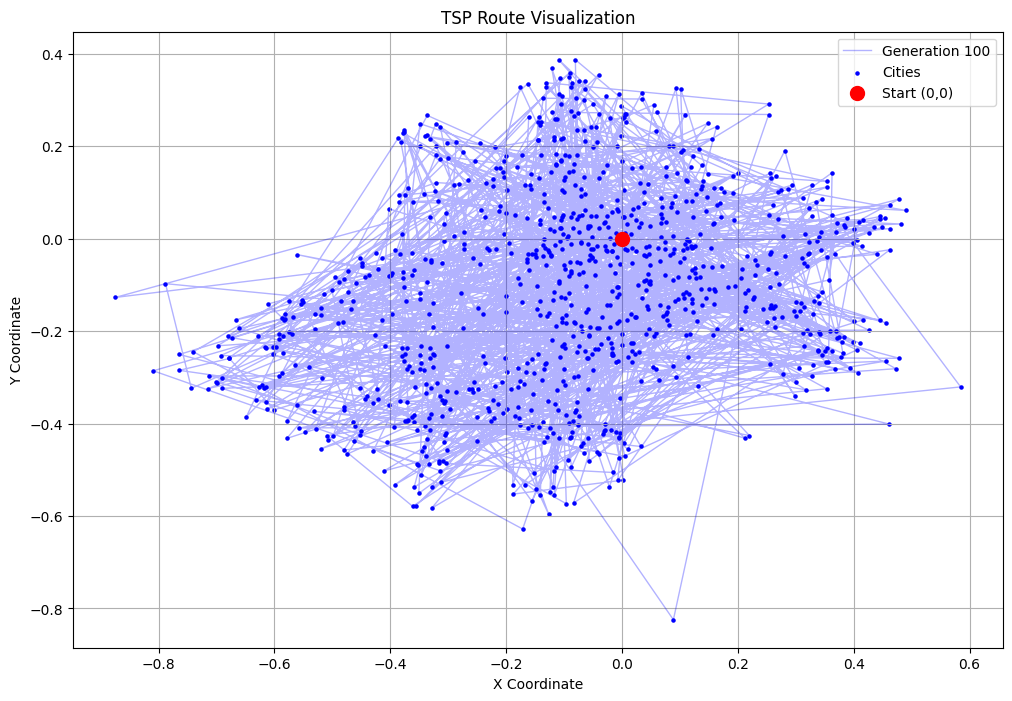

Best solution cost at all: 395.25576129611045
Best solution sequence: [0, 394, 401, 109, 711, 703, 779, 506, 97, 748, 251, 399, 582, 855, 787, 853, 90, 240, 772, 81, 733, 52, 225, 952, 291, 676, 871, 863, 948, 902, 610, 22, 221, 613, 5, 300, 263, 563, 900, 546, 654, 115, 641, 343, 526, 699, 410, 363, 204, 122, 771, 67, 857, 195, 895, 510, 687, 825, 799, 145, 605, 126, 137, 395, 984, 48, 15, 449, 247, 33, 87, 61, 775, 298, 273, 960, 930, 444, 538, 578, 626, 73, 463, 153, 533, 551, 536, 964, 859, 923, 920, 100, 88, 709, 215, 289, 380, 514, 372, 789, 489, 237, 316, 152, 56, 353, 675, 262, 754, 837, 557, 925, 975, 678, 8, 285, 59, 893, 580, 111, 723, 378, 26, 241, 958, 762, 646, 65, 936, 588, 725, 941, 903, 348, 50, 971, 176, 186, 187, 472, 347, 564, 867, 696, 230, 630, 622, 402, 691, 518, 778, 688, 370, 212, 216, 991, 742, 473, 705, 156, 719, 819, 29, 317, 831, 243, 550, 986, 421, 436, 229, 208, 913, 4, 592, 631, 502, 368, 117, 391, 493, 866, 573, 279, 761, 815, 373, 662, 222, 460, 151, 3

In [ ]:
import numpy as np
import csv
import random
import matplotlib.pyplot as plt

# Read city data from CSV
cities = []
with open('2024_AI_TSP.csv', mode='r', newline='') as tsp:
    reader = csv.reader(tsp)
    for row in reader:
        cities.append([float(row[0]), float(row[1])])

num_cities = len(cities)

# Function to measure Euclidean distance between two points
def distance(x, y):
    return np.linalg.norm(np.array(x) - np.array(y))

def initialize_population(num_cities, population_size=50):
    population = []
    #population_size를 population_size-1로 수정
    for _ in range(population_size-1):
        # Start with a list of all city indices
        solution = list(range(num_cities))
        # Remove the first city index to keep it fixed
        first_city = solution.pop(0)
        # Shuffle the remaining cities
        random.shuffle(solution)
        # Prepend the fixed first city back to the start
        solution.insert(0, first_city)
        population.append(solution)
    return population

#남아있는 도시 배열에서 query_point와 가장 가까운 도시를 찾는 함수
def nearest_neighbor_search(cities, remain_cities_index, query_point):
    min_cost = float('inf')
    nearest_city_index = None

    for idx in remain_cities_index:
        cost = distance(cities[idx], query_point)
        if cost < min_cost:
            min_cost = cost
            nearest_city_index = idx

    return nearest_city_index

#NN서치
def iterative_nn_search(cities):
  solution = []

  #남은 도시의 인덱스를 가진 배열 생성
  remain_cities_index = list(range(len(cities)))

  # 랜덤 시작 도시 설정
  start_city_index = random.randint(0, len(cities) - 1)
  solution.append(start_city_index)
  query_point = cities[start_city_index]

  #remain_cities_index에서 시작 도시 인덱스 삭제
  remain_cities_index.remove(start_city_index)

  #NN 서치
  for i in range(len(cities) - 1):
    nearest_city_index = nearest_neighbor_search(cities, remain_cities_index, query_point)
    solution.append(nearest_city_index)
    query_point = cities[nearest_city_index]
    remain_cities_index.remove(nearest_city_index)

  return solution

# initilalize population by nn search
def initialize_population_nn(cities, population_size=50):
    population = []
    solution = None

    # make solutions (population_size) times
    for _ in range(population_size):
        solution = iterative_nn_search(cities)
        population.append(solution)
    return population

def initialize_population_NN(num_cities, population_size=50):
    population = []
    for _ in range(population_size):
        # Start with a list of all city indices
        solution = list(range(num_cities))
        # Remove the first city index to keep it fixed
        first_city = solution.pop(0)
        # Shuffle the remaining cities
        random.shuffle(solution)
        # Prepend the fixed first city back to the start
        solution.insert(0, first_city)
        population.append(solution)
    return population

# Function to evaluate the cost of each solution in the populations
def evaluate_populations(populations, cities):
    scores = []
    for sol in populations:
        sol.append(sol[len(sol) - 1])
        total_cost = 0
        for idx in range(len(sol) - 1):
            pos_city_1 = cities[sol[idx]]
            pos_city_2 = cities[sol[idx+1]]
            total_cost += distance(pos_city_1, pos_city_2)
        scores.append(total_cost)
        sol.pop()
    return scores

#SELECTION
def selection(population, scores, num_best, population_best_num, population_rest_num):
    # num_best 개수만큼 좋은 해들을 뽑음
    best_solutions = select_best(population, scores, num_best, population_best_num)
    # num_rest 개수만큼 전체 해들을 뽑음
    rest_solutions = select_rest(population, scores, num_best, population_rest_num)
    # num_best+num_rest 전체에서 2개를 랜덤으로 뽑음
    selected_solutions = best_solutions + rest_solutions
    return selected_solutions

def select_best(population, scores, num_best, population_best_num):
    sorted_population = [x for _, x in sorted(zip(scores, population), key=lambda pair: pair[0])]
    return random.sample(sorted_population[:num_best], population_best_num)

# 전체 population에서 랜덤으로 선택
def select_random(population, num_random):
    return random.sample(population, num_random)

# best를 제외한 값들을 제외한 값들중에 랜덤으로 선택
def select_rest(population, scores, num_best, population_rest_num):
    sorted_population = [x for _, x in sorted(zip(scores, population), key=lambda pair: pair[0])]
    return random.sample(sorted_population[num_best :], population_rest_num)

#CROSSOVER
# Function to perform order_crossover between two solutions
def order_crossover(parent_1, parent_2):
    init_node = random.randint(0, num_cities - 1)
    before_end_node = random.randint(init_node, num_cities)
    temp = parent_1[init_node:before_end_node]
    front = parent_2[before_end_node:]
    back = parent_2[:before_end_node]
    # temp에 있는 값을 front 및 back에서 제외하고 새로운 리스트 생성
    front = [val for val in front if val not in temp]
    back = [val for val in back if val not in temp]

    child = front + temp + back

    return child

#MUTATION
# 부모 자식간의 distance 계산
def find_distance(parent, child):
    distance = 0
    for i in range(len(parent)):
      if parent[i] == child[i]:
        distance += 0
      else:
        distance += 1
    return distance

def hamming_distance(parent, child):
    # 두 경로 간의 해밍 거리를 계산하여 차이를 표현
    return sum(1 for p, c in zip(parent, child) if p != c)

def get_diff_val(parent1, parent2, child):
    distance_parent1 = hamming_distance(parent1, child)
    distance_parent2 = hamming_distance(parent2, child)
    return min(distance_parent1, distance_parent2)

# mutation rate 설정
mutation_rate1 = 0.03
mutation_rate2 = 0.01

# mutation함수
def mutate(parent_1, parent_2, solution):
    #유전 거리 계산
    diff_val = get_diff_val(parent_1, parent_2, solution)

   #유사도가 높을 수록 더 큰 rate 할당
    if diff_val < 990: #유사도가 높음
        mutation_rate = mutation_rate1
    else:
        mutation_rate = mutation_rate2

    # 랜덤 구간 뒤집기
    if random.random() < mutation_rate:
        start = random.randint(0, len(solution) - 1)  
        end = random.randint(0, len(solution) - 1)
        # 구간의 시작과 끝을 올바르게 정렬
        if start > end:
            start, end = end, start
        # 구간을 뒤집기
        solution[start:end + 1] = solution[start:end + 1][::-1]
  
    #랜덤 swap
    elif random.random() < mutation_rate:
        for i in range(len(solution)):
          j = random.randint(1, len(solution) - 1)
          if i == 0:
            continue
          solution[i], solution[j] = solution[j], solution[i]
    
    return solution


#REPLACEMENT
def get_bad_scores(scores):
    # temp_scores의 값들을 정렬하고 원래의 위치를 기억할 수 있도록 enumerate 사용
    indexed_scores = list(enumerate(scores))
    # 점수에 따라 내림차순 정렬
    indexed_scores.sort(key=lambda x: x[1], reverse=True)
    # 가장 값이 큰 5개의 위치 추출
    bad_scores = [indexed_scores[i][0] for i in range(min(5, len(scores)))]
    return bad_scores

def replace(parent1_idx, parent2_idx, child, scores, population):
    replaced_population = population
    # 부모 경로의 점수 추출
    parent1_score = scores[parent1_idx]
    parent2_score = scores[parent2_idx]
    # 자식 경로의 점수 추출
    total_cost = 0
    for idx in range(len(child) - 1):
        pos_city_1 = cities[child[idx]]
        pos_city_2 = cities[child[idx + 1]]
        total_cost += distance(pos_city_1, pos_city_2)
    total_cost += distance(cities[child[-1]], cities[child[0]])
    child_score = total_cost

    if child_score < parent1_score or child_score < parent2_score:
        # 자식해가 부모해 둘 중 하나보다 품질이 좋으면, 안 좋은 쪽을 대체
        if parent1_score > parent2_score:
            scores[parent1_idx] = child_score
            replaced_population[parent1_idx] = child
        else:
            scores[parent2_idx] = child_score
            replaced_population[parent2_idx] = child
    else:
        # 자식해가 부모해 둘 다보다 품질이 안 좋으면, 가장 안 좋은 품질의 해 5개 중 무작위로 하나 선택해 대체
        bad_scores = get_bad_scores(scores)
        n = random.choice(bad_scores)
        replaced_population[n] = child
        scores[n] = child_score
    return replaced_population

# Plot function modification to include the start point at (0,0)
def plot_path(solution, cities, generation):
    solution.append(int(0))
    plt.figure(figsize=(12, 8))
    x = [cities[i][0] for i in solution]
    y = [cities[i][1] for i in solution]

    # Plot the path
    plt.plot(x, y, 'b-', alpha=0.3, linewidth=1, label=f"Generation {generation}")
    plt.scatter(x, y, color='blue', s=5, label='Cities')  # Scatter plot for cities

    # Highlight the start point (0,0)
    plt.scatter(cities[0][0], cities[0][1], c='red', s=100, zorder=10, label='Start (0,0)')

    plt.title("TSP Route Visualization")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()
    solution.pop()


# Plot fuction the best solution's costs of every generation
def plot_least_cost(solutions_gen):
    gen_num = len(solutions_gen)
    plt.figure(figsize=(12, 8))
    plt.plot(solutions_gen)
    plt.xlabel("generations")
    plt.ylabel("least cost")
    plt.legend()
    plt.grid(True)
    plt.show()


#5조 팀튜링 GA
# Initialize population
population_size = 50
POPULATION_BEST_NUM = 8
POPULATION_REST_NUM = 2
num_cities = len(cities)

init_population_nn = initialize_population_nn(cities, 20)
population = init_population_nn


# Evaluate initial populations
scores = evaluate_populations(population, cities)

# Genetic algorithm parameters
generations = 100
num_best = 8
solutions_gen = []

# Genetic algorithm main loop
best_score = float('inf')
best_solution = None
for generation in range(generations+1):
    new_population = population
    i = 0
    selected_solutions = selection(population, scores, num_best, POPULATION_BEST_NUM, POPULATION_REST_NUM)
    parent1_idx = []
    parent2_idx = []
    child_list = []
   
    while i < len(population):
        #selection
        parent1, parent2 = random.sample(selected_solutions, 2)
        parent1_idx.append(population.index(parent1))
        parent2_idx.append(population.index(parent2))
        #crossover
        child = order_crossover(parent1, parent2)
        #mutation
        child = mutate(parent1, parent2, child)
        child_list.append(child)
        i += 1
    #replace
    for idx in range(len(parent1_idx)):
      new_population = replace(parent1_idx[idx], parent2_idx[idx], child_list[idx], scores, new_population)

    #replaced_population을 다음 population으로 지정
    population = new_population
    scores = evaluate_populations(population, cities)

    # Find the best solution for this generation
    generation_best_score = min(scores)
    generation_best_index = scores.index(generation_best_score)
    generation_best_solution = population[generation_best_index]

    # the best solution to solutions_gen
    solutions_gen.append(generation_best_score)

    # Update the overall best solution if the new one is better
    if generation_best_score < best_score:
        best_score = generation_best_score
        best_solution = generation_best_solution

    # Plot best solution for this generation
    if generation % 10 == 0:  # Plot every 10 generations
        print(scores)
        print('Best solution cost at generation', generation, ':', generation_best_score)

idx = best_solution.index(0)

front = best_solution[idx:]
back = best_solution[0:idx]
   
best_solution = front + back

output_file = f'solution.csv'
with open(output_file, 'w') as f:
  for number in best_solution:
    f.write(f"{number}\n")
    
# Output the best solution found
plot_least_cost(solutions_gen)
plot_path(best_solution, cities, generation)
print('Best solution cost at all:', best_score)
print('Best solution sequence:', best_solution)


Genetic Algorithm은 전역 최적해를 보장하지 않는다. 따라서 알고리즘이 수렴할 때까지 최적화가 계속 진행되고, 이 과정에서 이전에 선택된 해보다 더 나은 해를 찾을 수 있다.
또한, 세대 간에 해의 선택 및 변이 과정에서 무작위성이 사용되기 때문에 결과가 매번 다를 수 있다.

- Genetic algorithm main loop에서 Selection 메소드 추가하기
